📘 Phase 1: Report Summary Notebook (results_summary.ipynb)
This notebook will include:

✅ Overview of the pipeline (voice → text → mining → evaluation)

✅ Per-language WER and error summary

✅ Frequency tables + word cloud highlights

✅ Cross-language comparison table

✅ Observations (e.g., Turkish token bias in low-resource languages)

I’ll prepare a clean template for this next.

📘 Phase 2: Knowledge Graph
Planned steps:

🔄 Normalize all word frequency outputs (GT + Whisper)

🧠 Create nodes for unique tokens across languages

🔗 Link nodes based on:

frequency

morphology (shared stems/suffixes)

overlap between GT and Whisper

📊 Visualize with NetworkX (or optionally D3.js for the web)

# 🧠 Dialectal Word Mining: Final Report Summary

This notebook summarizes the results of a voice-to-text and dialectal word mining pipeline applied to Turkish, Kurmancî, and Zazaki. It covers ASR evaluation, word frequency analysis, and cross-language comparison as a baseline for building dialect-aware knowledge graphs.


In [7]:
import pandas as pd

wer_summary = pd.DataFrame({
    "Language": ["Turkish", "Kurmanci", "Zazaki"],
    "Whisper WER": [0.276, 1.342, 1.048],
    "Wav2Vec2 WER": [0.419, None, None],
    "Samples (GT)": [11352, 3970, 463],
    "Unmatched (Whisper)": [7743, 3967, 461]
})

wer_summary


,Language,Whisper WER,Wav2Vec2 WER,Samples (GT),Unmatched (Whisper)
0,Turkish,0.276,0.419,11352,7743
1,Kurmanci,1.342,NaN,3970,3967
2,Zazaki,1.048,NaN,463,461


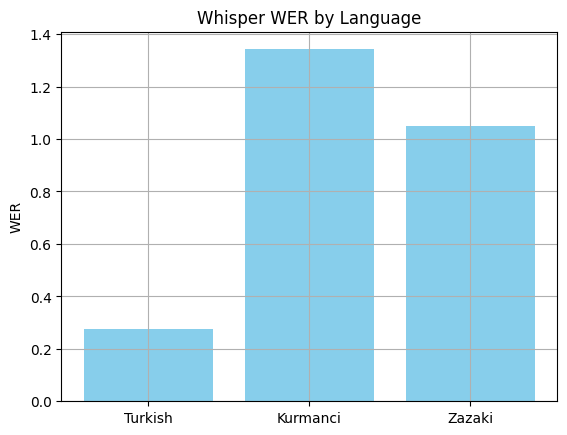

In [8]:
import matplotlib.pyplot as plt

plt.bar(wer_summary["Language"], wer_summary["Whisper WER"], color="skyblue")
plt.title("Whisper WER by Language")
plt.ylabel("WER")
plt.grid(True)
plt.show()


In [9]:
from IPython.display import display
import os

def load_top_words(path, column, n=10):
    return pd.read_csv(path)[column].head(n).tolist()

langs = ["Turkish", "Kurmanci", "Zazaki"]
lang_paths = {
    "Turkish": "../outputs/frequencies/turkish/",
    "Kurmanci": "../outputs/frequencies/kurmanci/",
    "Zazaki": "../outputs/frequencies/zazaki/"
}

for lang in langs:
    print(f"🌍 {lang}")
    gt = load_top_words(os.path.join(lang_paths[lang], "gt_word_freq.csv"), "word")
    whisper = load_top_words(os.path.join(lang_paths[lang], "whisper_word_freq.csv"), "word")
    print("GT:", ", ".join(gt))
    print("Whisper:", ", ".join(whisper))
    print()


🌍 Turkish
GT: bir, bu, ve, ne, de, tr, 2, da, 0, male_masculine
Whisper: bir, bu, ve, ne, de, da, çok, daha, için, ben

🌍 Kurmanci
GT: ji, li, bi, xwe, û, min, ez, e, de, di
Whisper: bir, ve, bu, o, da, kere, şey, zaman, daha, de

🌍 Zazaki
GT: ra, de, xo, ez, ma, to, mı, ke, u, ro
Whisper: bu, o, ve, de, ne, bir, ki, ez, da, mi



In [10]:
def overlap(a, b):
    return len(set(a) & set(b)) / len(set(a)) if a else 0

for lang in langs:
    gt = load_top_words(os.path.join(lang_paths[lang], "gt_word_freq.csv"), "word")
    whisper = load_top_words(os.path.join(lang_paths[lang], "whisper_word_freq.csv"), "word")
    score = overlap(gt, whisper)
    print(f"{lang} token overlap: {score:.2f}")


Turkish token overlap: 0.60
Kurmanci token overlap: 0.10
Zazaki token overlap: 0.20


## ✏️ Observations

- **Turkish** has low WER and high overlap, suggesting Whisper performs well.
- **Kurmancî** and **Zazaki** show much higher WER, and Whisper predictions are dominated by Turkish tokens like "bir", "bu", "ve".
- Token overlap drops from 60% (Turkish) to 10–20% in other languages.
- This suggests that dialect-specific words are not captured well in zero-shot ASR.
